<a href="https://colab.research.google.com/github/harinimadura/testrepo/blob/master/Week-01-Exercise01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?export=view&id=1DXUVHxd4t15mfuqMgMCLnsP4jWVI5EWz)

---

© 2022 Copyright The University of New South Wales - CRICOS 00098G

**Author**: Oscar Perez-Concha: o.perezconcha@unsw.edu.au

**Contributors/Co-authors**: Marta Fredes-Torres, Zhisheng (Sandy) Sa and Matthew Sainsbury-Dale.

# Exercise 1: Introduction to ML and Data Mining: Data Preparation

# 1. Introduction: 

---



In this first notebook, we will become familiar with the <b> diabetes hospitalisations - inpatient hospital data set </b> which will be used throughout the course. This exercise will guide you on how to check, visualise and clean data for the analysis. 

## 1.1. Aims
 1. To become familiar with the <b> diabetes hospitalisations - inpatient hospital data set </b> and the <b>clinical terms</b> contained within it
 2. To become familiar with the data dictionary
 3. To compute basic statistics of our data 
 4. To visualise and explore our data, in particular, how our input data relates to the output.
 5. To clean our data 
 
## 1.2. Important tips to use this Jupyter Notebook
 1. Run all the cells in sequence (one at a time), using the "Run" button.
 2. To edit this notebook, just double-click in each cell. Choose between "Code" cell (for Python code) or text "Markdown" cell in the combo-box above. 
 3. If you want to save your notebook, please make sure you press "the floppy disk" icon button above. 
 4. To clean the content of all cells and re-start Notebook, please go to Edit->Clear all outputs

Follow the instructions given and if you have any questions, please use the **Comments section** in **Open Learning**. 

## 1.3. Checks and Libraries
   1. For this Notebook to work, Python version must be higher than **3.6.x**  [(Instructions for anaconda user)](https://docs.anaconda.com/anaconda/install/update-version)
   2. Make sure you have installed **plotnine, matplotlib and seaborn library**. Instructions or Application Programming Interface (API) for [plotnine](http://plotnine.readthedocs.io/en/stable/installation.html), [matplotlib](https://matplotlib.org/3.1.1/users/installing.html) and [seaborn](https://seaborn.pydata.org/installing.html).
   3. Make sure you have mounted the google drive where the chapter file is located. The defalt path is `/content/drive/My Drive/Colab Notebooks/chapter01`, if you are using a different path, please edit accordingly.
   4. We are going to use **pandas** or **DataFrame**, which are the Python equivalent to data.frame in R.
 (More information see the API for [pandas](https://pandas.pydata.org/) and [pandas reference](http://pandas.pydata.org/pandas-docs/stable/api.html))

In [2]:
# check python version
import sys
print('Current python version: ', sys.version)
assert sys.version_info > (3, 6), 'Python version needs to be higher than 3.6'

Current python version:  3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]


In [3]:
# check required libraries are installed if not calling system to install
import sys
import subprocess
import pkg_resources

required = {'numpy', 'pandas', 'plotnine', 'matplotlib', 'seaborn', 
            'grid', 'lime', 'shap', 'scikit-learn'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    print('Installing: ', missing)
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)
# delete unwanted variables
del required 
del installed 
del missing

Installing:  {'shap', 'grid', 'lime'}


In [4]:
# import required libraries
import numpy as np
from scipy import sparse
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Mount Google Drive
# We do not need to run this cell if you are not running this notebook in Google Colab

if 'google.colab' in str(get_ipython()):
    from google.colab import drive # import drive from Gogle colab
    root = '/content/drive'     # default location for the drive
    print(root)                 # print content of ROOT (Optional)
    drive.mount(root)
else:
    print('Not running on CoLab')



/content/drive
Mounted at /content/drive


If you are running this notebook in Google Colab, you must define your project paths. In this case, define your `project_path`. Otherwise, all the data will be lost after you close the session.

In [6]:
from pathlib import Path
if 'google.colab' in str(get_ipython()):
    # EDIT THE PROJECT PATH IF DIFFERENT WITH YOUR ONE
    # 
    project_path = Path(root) / 'MyDrive' / 'HDAT9500' / 'week01'
    
    # OPTIONAL - set working directory according to your google drive project path
    # import os
    # Change directory to the location defined in project_path
    # os.chdir(project_path)
else:
    project_path = Path()

# 2. Machine Learning and Data Mining Work-Flow: 

In Machine Learning (ML), we follow a pattern to transform the data from raw data format to some valuable information by using data mining techniques and building ML models. The machine learning and data mining work-flow provides a series of steps to build a multi-ML parallel pipeline system to examine the outcomes of different ML methods. 

**In this exercise, we are going to visualise and explore the data, focusing on our output of readmission to hospital. In particular, in this exercise, we will go through steps:**

#### Step 1. Research question:
#### Steps 2 and 3. Data and Data Gathering.
#### Step 4: Exploratory Data Analysis: Preparing Data, Visualisation, Exploration (Basic Statistics) and Data Manipulation

![alt text](https://drive.google.com/uc?export=view&id=105SGqeyo8RgLhSO8mN7ZE5OsG0YiLPKt)

For more information, see [this video by Google Cloud Platform](https://www.youtube.com/watch?v=nKW8Ndu7Mjw&feature=youtu.be&list=PLIivdWyY5sqJxnwJhe3etaK7utrBiPBQ2). Note that they only considered steps 1-7. We include 8. Interpretation (since interpretation is very important in the health context) and 9.Deployment (to deploy the final model in a hospital, government,...).

# 3. Step 1. Defining our Research Question


1. Define the problem: What are we interested in answering? 
2. Is our problem a health data science problem? What type of health data science problem is it? 
3. Clearly formulate the problem.
4. Do we need ML algorithms?
5. Is our question about description, prediction or causal inference? See an example of the type of questions that we can have. This table from [Miguel A. Hernán, John Hsu & Brian Healy (2019)](https://doi.org/10.1080/09332480.2019.1579578). Unsupervised learning fits in the "description" column, Supervised learning is "prediction" and Reinforcement learning is related to the causal inference column.
        
![alt text](https://drive.google.com/uc?export=view&id=1kRiDLIGoHUTT-HWiZz2SXs4hWg1OVWeL)

In this first chapter, our final goal is: **to build a predictive algorithm to predict (at the time of admission) whether a patient with diabetes will be readmitted to the hospital after discharge or not**. We will build this predictive algorithm in exercises 1, 2 and 3.

The time at which we make the prediction is very important. For the time being, just remember that. We will go back to this in exercise 3. 

Please note that **readmission** is a categorical feature. The way this variable has been defined in our data set is as follows:

1. 'YES', if the patient has been readmitted to hospital within 30 days of discharge, 
2. 'NO', otherwise.

We are interested in readmissions that occur within 30 days of discharge. Why 30 days?

It is a reasonable number of days that most goverments use around the world in order to measure quality of care provided during hospitalisation. We hypothesise that if the readmission happens within 30 days of discharge, there is a high chance that the readmission is due to suboptimal procedures or factors from the main hospitalisation. On the contrary, if the readmission occurs after 30 days of discharge, there are other factors (apart from the main hospitalisation) that can play a role in readmission.

# 4. Docstring

Create a docstring with the variables and constants that you will use in this exercise (data dictionary) and the aim or purpose of your program. It is expected that you choose informative variable names and document your program (both docstrings and comments). The way we usually create a docstring is by populating the list/dictionary below everytime we create a new constant or variable in our program. By doing this, anyone who reads our program, including ourselves since our memories are not as good as we think they are, know exactly what every constant or variable represent. 

**== Pupose of program ==**<br>
 1. To become familiar with the <b> diabetes hospitalisations - inpatient hospital data set </b> and the <b>clinical terms</b> contained within it
 2. To become familiar with the data dictionary
 3. To compute basic statistics of our data 
 4. To visualise and explore our data, in particular, how our input data relates to the output.
 5. To clean our data 

<b> Add to the answer here:</b>
#####################################################################################################################

(double-click here)

**== Variables ==**

For _setup directory_

* `root` file path for google drive
* `project_path` file path for project data, output, notebook etc

For _dataset preparation_ (i.e. feature/target and train/test)
- `path_csv` path where the CSV file is contained
- `hospital` pandas DataFrame object contains original data
- `hospital_clean` pandas DataFrame object contains cleaned data for output

For _Intermediate Variables_ (i.e. deleted after use)
- `required` a set of required libraries for chapter 01
- `installed` a set of installed libraries in the system
- `missing` a set of missing libraries from the required list
- `cat_features` a list object contains the name of categorical features
- `fearture` a temporary object used looping through categorical features
- `hosp_temp` a pandas DataFrame object used for data transformation 
- `ax` a AxesSubplot object to arrange plots
- `color` a list object for colour definition
- `f` heatmap plot output figure
- `i` a temporary object used looping through varies loops
- `p` FacetGrid output figure
- `pal` a dict object for colour definition
- `total` float64 as total of `totals`
- `totals` list object contains proportion for bar plot

For data _visualization_ and _analysis_
- `hospital_plot` pandas DataFrame to create long format data used in plotting


**== Constant (Universal) ==**

(add any constant variables here)
#####################################################################################################################

# 5. Steps 3 and 4. Data and Data Gathering: Predicting Hospital Readmission for Patients with Diabetes 

The description of the variables or <b>data dictionary</b> of our dataset can be found in the data folder: [<b>data/diabetes/Data_Dictionary.pdf</b>](https://github.com/CBDRH-HDAT9500/week01/blob/a96a5830df7f2cd90bcaf671f8f69a8b92a2947f/data/diabetes/Data_Dictionary.pdf)

**Make sure you understand which variables are <font color=green> continuous</font> and which ones are <font color=green>categorical or nominal</font>.**

## 5.1 Load the data and check its dimensions 

1. We import our dataset and print it. Note that using `pd.read_csv` will result in the dataset as a "pd.DataFrame".

2. Let us print the names and numbers of our **indexes** (or rows) and **columns/features.**



Write the correct path pointing to the file where you copied the datasets 

Change the path accordingly to your own path. If the path is taken directly from GitHub:
path_csv= "https://raw.githubusercontent.com/CBDRH-HDAT9500/chapter01/master/data/diabetes/diabetes.csv?token=GHSAT0AAAAAABSWBFCFQENBAEEDM3VMGHH2YTLQF6Q"

In [7]:
# Write the correct path pointing to the file where you copied the datasets 

# Change the path accordingly to your own path. If the path is taken directly from GitHub:
# path_csv= "https://raw.githubusercontent.com/CBDRH-HDAT9500/chapter01/master/data/diabetes/diabetes.csv?token=GHSAT0AAAAAABSWBFCFQENBAEEDM3VMGHH2YTLQF6Q"

# Change the path accordingly to your own path. If the path is taken from Google Drive or your local folder:
path_csv = Path(project_path) /'data/diabetes/diabetes.csv'


In [8]:
import pandas as pd

hospital = pd.read_csv(path_csv,sep=',')

In [9]:
# Print the columns/features names of our dataset using 'DataFrame.columns':
print("Features of hospital data:", hospital.columns)

# Print the number of rows and columns using 'DataFrame.shape':
print("Number of rows and columns: ", hospital.shape) 

Features of hospital data: Index(['admission_type_id', 'admission_source_id', 'patient_id', 'los', 'Age',
       'admission_id', 'sex', 'weight', 'discharge_disposition_id',
       'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult',
       'number_diagnoses', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_emergency', 'number_inpatient',
       'number_outpatient', 'group_name_1', 'group_name_2', 'group_name_3',
       'readmission'],
      dtype='object')
Number of rows and columns:  (69270, 24)


**Note:** 'los' stands for length of stay. Time in hospital or number of days between admission and discharge.
Please see Table 1, page 3 of [this paper](http://dx.doi.org/10.1155/2014/781670)

## 5.2 Nature of the features

Let's use the Python command `DataFrame.dtypes` to check if our variables are continuous or categorical and if they are aligned with the Data Dictionary. 

Please note that the Data Dictionary is located in the folder: [<b>data/diabetes/Data_Dictionary.pdf</b>](https://github.com/CBDRH-HDAT9500/week01/blob/a96a5830df7f2cd90bcaf671f8f69a8b92a2947f/data/diabetes/Data_Dictionary.pdf)

In [10]:
# Checking the nature of our variables in Python
hospital.dtypes

admission_type_id            int64
admission_source_id          int64
patient_id                   int64
los                          int64
Age                          int64
admission_id                 int64
sex                         object
weight                      object
discharge_disposition_id     int64
payer_code                  object
medical_specialty           object
max_glu_serum               object
A1Cresult                   object
number_diagnoses             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_emergency             int64
number_inpatient             int64
number_outpatient            int64
group_name_1                object
group_name_2                object
group_name_3                object
readmission                 object
dtype: object

We can see that 'admission_type_id', 'discharge_disposition_id' and 'admission_source_id' are read in as continuous variables in our dataset. However, according to the Data Dictionary, these variables should be categorical.

**Let's transform the variables 'admission_type_id', 'discharge_disposition_id' and 'admission_source_id' from continuous to categorical** (please note that regarding the data dictionary, these variables are categorical and not numerical). 

For this, we will create new variables: 'admission_type_id_cat', 'discharge_disposition_id_cat' and 'admission_source_id_cat'.

Note: Alternatively, column types can be defined during data import. See [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) for details

In [11]:
# Changing variables from continuous to categorical
hospital[['admission_type_id_cat','discharge_disposition_id_cat','admission_source_id_cat']] = hospital[['admission_type_id','discharge_disposition_id','admission_source_id' ]].astype('category')

Now that all the variables in our dataset are aligned with the Data Dictionary, we will drop the old variables 'admission_type_id', 'discharge_disposition_id' and 'admission_source_id'.

In [12]:
# Python command to drop variables: DataFrame.drop([column selection], axis=1)
hospital = hospital.drop(['admission_type_id','discharge_disposition_id','admission_source_id'],axis=1)

In [13]:
# Check
hospital.dtypes

patient_id                         int64
los                                int64
Age                                int64
admission_id                       int64
sex                               object
weight                            object
payer_code                        object
medical_specialty                 object
max_glu_serum                     object
A1Cresult                         object
number_diagnoses                   int64
num_lab_procedures                 int64
num_procedures                     int64
num_medications                    int64
number_emergency                   int64
number_inpatient                   int64
number_outpatient                  int64
group_name_1                      object
group_name_2                      object
group_name_3                      object
readmission                       object
admission_type_id_cat           category
discharge_disposition_id_cat    category
admission_source_id_cat         category
dtype: object

### 5.2.1 Diagnosis Codes:  

ICD-10 codes are the international codes used to classify diagnoses (e.g. diabetes mellitus). In Australia, we use an Australian version of the international ICD-10 codes, ICD-10-AM. For more information about ICD-10-AM classification, please visit [IHPA website](https://www.ihpa.gov.au/what-we-do/ICD-10-AM/ACHI/ACS-classification-system).

The hospital dataset originally included three ICD-10 diagnosis codes. The first one referred to the primary diagnosis code, that is, the main reason for hospitalisations. However, patients usually have comorbidities, or multiple diagnoses. This is why, we had two more diagnoses recorded in this dataset. 

In this exercise, we removed the icd10 features 'icd10_d1', 'icd10_d2', and 'icd10_d3', the main reason being that these variables have many levels and only a few examples for each level.  Therefore, it would be very difficult for the algorithm to learn something useful.

Including all the icd10 features would introduce too many dummy variables which we will go through creating dummy variables later in this course (approximately 2000 dummy variables arise from the icd10 features alone).
As we will see, many Machine Learning algorithms introduce some limitation to the number of levels a variable can have. 

Instead, we will keep the variables **'group_name_1', 'group_name_2' and 'group_name_3'** which groups all ICD-10 levels in 10 categories ([check data dictionary for more information](https://github.com/CBDRH-HDAT9500/week01/blob/a96a5830df7f2cd90bcaf671f8f69a8b92a2947f/data/diabetes/Data_Dictionary.pdf))
    
<b> NB: </b> In future chapters, we will learn how to keep these variables via a new learned representation in a lower dimensionality (Chapter 7: Embeddings with Neural Networks)

# 6. Step 4. Visualisation and exploration of our data


First things first: **look at our data.** 

In [14]:
# We use 'DataFrame.head()' to visualise the first records of our dataset
hospital.head()

,patient_id,los,Age,admission_id,sex,weight,payer_code,medical_specialty,max_glu_serum,A1Cresult,...,number_emergency,number_inpatient,number_outpatient,group_name_1,group_name_2,group_name_3,readmission,admission_type_id_cat,discharge_disposition_id_cat,admission_source_id_cat
0,360576,2,79,62781276,Female,?,?,?,None,None,...,0,0,0,Other,Endocrine,Infectious,no,3,18,7
1,8151831,5,59,49223976,Male,?,?,Pulmonology,None,>8,...,0,0,0,Endocrine,Cardiac_&_circulatory,Other,no,3,1,7
2,90219069,2,33,210634308,Female,?,MD,?,None,None,...,1,0,1,Other,Endocrine,Cardiac_&_circulatory,no,3,1,7
3,54294840,6,42,163620402,Female,?,?,?,None,None,...,0,0,0,Infectious,Respiratory,Endocrine,no,3,6,7
4,1634688,1,62,69055020,Male,?,?,Cardiology,None,None,...,0,0,0,Cardiac_&_circulatory,Cardiac_&_circulatory,Cardiac_&_circulatory,no,3,1,7


For prediction purposes, we are not interested in the first two columns (admission_id and patient_id), which are just identifiers. Therefore, we will drop these variables from our dataset. Do you agree? Why do we have to delete these variables? Python command: `DataFrame.drop([column names],axis=1)`

[More information](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [15]:
# We drop 'admission_id' and 'patient_id' by using the command: DataFrame.drop([column selection], axis=1)
hospital = hospital.drop(['admission_id', 'patient_id'], axis = 1)

In [16]:
# Sanity check
hospital.head()

,los,Age,sex,weight,payer_code,medical_specialty,max_glu_serum,A1Cresult,number_diagnoses,num_lab_procedures,...,number_emergency,number_inpatient,number_outpatient,group_name_1,group_name_2,group_name_3,readmission,admission_type_id_cat,discharge_disposition_id_cat,admission_source_id_cat
0,2,79,Female,?,?,?,None,None,9,38,...,0,0,0,Other,Endocrine,Infectious,no,3,18,7
1,5,59,Male,?,?,Pulmonology,None,>8,8,49,...,0,0,0,Endocrine,Cardiac_&_circulatory,Other,no,3,1,7
2,2,33,Female,?,MD,?,None,None,5,62,...,1,0,1,Other,Endocrine,Cardiac_&_circulatory,no,3,1,7
3,6,42,Female,?,?,?,None,None,9,77,...,0,0,0,Infectious,Respiratory,Endocrine,no,3,6,7
4,1,62,Male,?,?,Cardiology,None,None,7,13,...,0,0,0,Cardiac_&_circulatory,Cardiac_&_circulatory,Cardiac_&_circulatory,no,3,1,7


## 6.1 Column and row selection

We select some of the columns to **look at our data**. 

* `DataFrame.iloc`: Purely integer-location based indexing for selection by position. [See pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)

We use **iloc** to access specific records and columns, by using the command: `DataFrame.iloc[row selection, colummn selection]`. [Source documentation.](https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/)

In [17]:
# DataFrame.iloc[row selection,column selection]
print(hospital.iloc[0:20,0:5])   # Selecting the first 20 rows and columns 0 to 5 from 'hospital' data

    los  Age     sex weight payer_code
0     2   79  Female      ?          ?
1     5   59    Male      ?          ?
2     2   33  Female      ?         MD
3     6   42  Female      ?          ?
4     1   62    Male      ?          ?
5     1   53  Female      ?         HM
6    10   80  Female      ?          ?
7     2   44    Male      ?          ?
8     1   73    Male      ?         MC
9     4   64  Female      ?          ?
10    4   61  Female      ?          ?
11    7   65  Female      ?          ?
12    4   86    Male      ?         MC
13    1   52  Female      ?         SP
14    2   58  Female      ?          ?
15    3   84  Female      ?          ?
16    3   69    Male      ?         OG
17    2   57    Male      ?          ?
18    2   43    Male      ?         OG
19    4   80  Female      ?         MC


* `DataFrame.loc`: The *loc* indexer can be used to select rows by label/index or to select rows with a boolean/conditional lookup. [See pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)

As the *iloc* indexer, the command of **loc** is: `DataFrame.loc[row selection, colummn selection]` [Source](https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/)

In [18]:
# DataFrame.loc[row selection,column selection]
print(hospital.loc[0:20,'sex':'medical_specialty']) #Selecting the first 20 rows for columns 'sex' to 'medical_specialty' 

       sex weight payer_code medical_specialty
0   Female      ?          ?                 ?
1     Male      ?          ?       Pulmonology
2   Female      ?         MD                 ?
3   Female      ?          ?                 ?
4     Male      ?          ?        Cardiology
5   Female      ?         HM                 ?
6   Female      ?          ?        Nephrology
7     Male      ?          ?           Urology
8     Male      ?         MC                 ?
9   Female      ?          ?       Orthopedics
10  Female      ?          ?                 ?
11  Female      ?          ?                 ?
12    Male      ?         MC                 ?
13  Female      ?         SP  InternalMedicine
14  Female      ?          ?                 ?
15  Female      ?          ?  InternalMedicine
16    Male      ?         OG  Emergency/Trauma
17    Male      ?          ?                 ?
18    Male      ?         OG                 ?
19  Female      ?         MC  InternalMedicine
20  Female   

Missing values can be observed for the variables 'weight', 'payer_code' and 'medical_specialty'. We will explore our dataset in greater depth in the following steps.

## 6.2 Descriptive statistics

The command `DataFrame.describe()` generates descriptive statistics that summarise the content of our dataset:

1. `DataFrame.describe()`: only includes continuous variables
2. `DataFrame.describe(include='all')`: continuous and categorical variables
 
[More information](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

### 6.2.1 Statistics of all the features
Let's use the Python command `DataFrame.describe(include='all')` to see the statistics of **all the categorical and continuous/numeric variables** recorded in our dataset. 

Please note that the Data Dictionary is located in the folder: [data/diabetes/Data_Dictionary.pdf](./https://github.com/CBDRH-HDAT9500/week01/blob/a96a5830df7f2cd90bcaf671f8f69a8b92a2947f/data/diabetes/Data_Dictionary.pdf)

In [19]:
# Statistics of all the variables in our dataset
hospital.describe(include='all')

,los,Age,sex,weight,payer_code,medical_specialty,max_glu_serum,A1Cresult,number_diagnoses,num_lab_procedures,...,number_emergency,number_inpatient,number_outpatient,group_name_1,group_name_2,group_name_3,readmission,admission_type_id_cat,discharge_disposition_id_cat,admission_source_id_cat
count,69270.000000,69270.000000,69270,69270,69270,69270,69270,69270,69270.000000,69270.000000,...,69270.000000,69270.000000,69270.000000,69270,69270,69270,69270,69270.0,69270.0,69270.0
unique,NaN,NaN,3,10,18,63,4,4,NaN,NaN,...,NaN,NaN,NaN,10,10,10,2,7.0,20.0,14.0
top,NaN,NaN,Female,?,?,?,None,None,NaN,NaN,...,NaN,NaN,NaN,Cardiac_&_circulatory,Cardiac_&_circulatory,Cardiac_&_circulatory,no,1.0,1.0,7.0
freq,NaN,NaN,36841,66504,29912,33422,65941,56785,NaN,NaN,...,NaN,NaN,NaN,20407,21620,20418,57351,25933.0,43689.0,44510.0
mean,6.155291,67.281363,NaN,NaN,NaN,NaN,NaN,NaN,7.620312,43.111304,...,0.282951,0.221005,0.774852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.240160,16.149080,NaN,NaN,NaN,NaN,NaN,NaN,2.326690,19.925551,...,0.883800,0.650016,2.022062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.000000,56.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,31.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.000000,69.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,44.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,9.000000,79.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,57.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see, this information is not very useful for the purpose of this exercise, which is to predict patients at risk of readmission after discharge. Therefore, we will analyse the descriptive statistics of our features regarding readmission: 'yes' and 'no'.

### 6.2.2 Statistics of all the features regarding 'readmission'

In [20]:
# Summary of the features regarding clients with readmission = 'yes'
hospital[hospital['readmission'] == 'yes'].describe(include='all')

,los,Age,sex,weight,payer_code,medical_specialty,max_glu_serum,A1Cresult,number_diagnoses,num_lab_procedures,...,number_emergency,number_inpatient,number_outpatient,group_name_1,group_name_2,group_name_3,readmission,admission_type_id_cat,discharge_disposition_id_cat,admission_source_id_cat
count,11919.000000,11919.000000,11919,11919,11919,11919,11919,11919,11919.000000,11919.000000,...,11919.000000,11919.000000,11919.000000,11919,11919,11919,11919,11919.0,11919.0,11919.0
unique,NaN,NaN,2,10,17,46,4,4,NaN,NaN,...,NaN,NaN,NaN,10,10,10,1,7.0,17.0,11.0
top,NaN,NaN,Female,?,?,?,None,None,NaN,NaN,...,NaN,NaN,NaN,Cardiac_&_circulatory,Cardiac_&_circulatory,Cardiac_&_circulatory,yes,1.0,1.0,7.0
freq,NaN,NaN,6402,11393,5445,5828,11278,9794,NaN,NaN,...,NaN,NaN,NaN,3598,3767,3535,11919,8577.0,6704.0,8491.0
mean,15.340800,77.094219,NaN,NaN,NaN,NaN,NaN,NaN,9.468412,45.057723,...,1.169897,0.522863,3.164276,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.054148,15.840462,NaN,NaN,NaN,NaN,NaN,NaN,2.930959,19.870622,...,1.544033,0.949272,3.374588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,9.000000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,12.000000,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,33.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,15.000000,79.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,46.000000,...,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,18.000000,89.000000,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,59.000000,...,2.000000,1.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Summary of the features regarding clients with readmission = 'no'
hospital[hospital['readmission'] == 'no'].describe(include='all')

,los,Age,sex,weight,payer_code,medical_specialty,max_glu_serum,A1Cresult,number_diagnoses,num_lab_procedures,...,number_emergency,number_inpatient,number_outpatient,group_name_1,group_name_2,group_name_3,readmission,admission_type_id_cat,discharge_disposition_id_cat,admission_source_id_cat
count,57351.000000,57351.000000,57351,57351,57351,57351,57351,57351,57351.000000,57351.000000,...,57351.000000,57351.000000,57351.000000,57351,57351,57351,57351,57351.0,57351.0,57351.0
unique,NaN,NaN,3,10,18,63,4,4,NaN,NaN,...,NaN,NaN,NaN,10,10,10,1,7.0,20.0,14.0
top,NaN,NaN,Female,?,?,?,None,None,NaN,NaN,...,NaN,NaN,NaN,Cardiac_&_circulatory,Cardiac_&_circulatory,Cardiac_&_circulatory,no,3.0,1.0,7.0
freq,NaN,NaN,30439,55111,24467,27594,54663,46991,NaN,NaN,...,NaN,NaN,NaN,16809,17853,16883,57351,23021.0,36985.0,36019.0
mean,4.246308,65.242001,NaN,NaN,NaN,NaN,NaN,NaN,7.236230,42.706788,...,0.098621,0.158271,0.278269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.927615,15.449194,NaN,NaN,NaN,NaN,NaN,NaN,1.973829,19.913256,...,0.500535,0.547904,1.067145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.000000,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,31.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.000000,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,44.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.000000,77.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,57.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-success">**Start Activity**</div>

### <font color='brown'> Question 1: Which are the main differences between readmitted patients versus those who are not readmitted?. Type your answer in the space provided below.</font>


<b> Write the answer here:</b>
#####################################################################################################################

Re-admiited patients were on average older (77 vs 65 years), spent more time in the hospital (2 weeks vs 4 days), revieved more medical diagnoses and had more medications compared with their non-readmitted counterparts. 

#####################################################################################################################

<div class="alert alert-block alert-warning">**End Activity**</div>

### 6.2.3 Statistics of output variable 'Readmission': value counts and percentages

As mentioned above, in this first chapter, we will build a predictive algorithm to predict if a patient with diabetes will be readmitted to the hospital after discharge. That is, **readmission** will be the outcome variable. 

**Let's analyse the descriptive statistics (value counts and percentages) of the output variable 'readmission'.**

<div class="alert alert-block alert-success">**Start Activity**</div>

### <font color='brown'> Question 2: Can you write the code that calculates value counts and percentages for the variable 'readmission'? Type your answer in the space provided below.</font>

<p><font color='green'> Tip:  Use this structure for value counts: "DataFrame['column selection'].describe()"</font></p>

<p><font color='green'> Use this structure for percentages: "DataFrame['column selection'].value_counts(normalize=True)*100"</font></p>


In [22]:
# Write Python code here for 'value counts':
value_counts = hospital['readmission'].describe() 

In [23]:
# Write Python code here for 'percentages':
percentages = hospital['readmission'].value_counts(normalize=True)*100

<div class="alert alert-block alert-warning">**End Activity**</div>

As we can see, our dataset is an <b> imbalanced dataset </b>. [Read this article about imbalance datasets](
https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/).

## 6.3. Correlation: 

We will use a correlation matrix to analyse this property for our data set. 

This command allows us to visualise the **linear** correlation of the <font color='red'>**continuous variables**</font> of our dataset only. This is important since the correlation is the measure of a linear relationship between two variables, and for categorical variables with multiple levels, the correlation is not appropiate.

The function `DateFrame.corr()` calculates the standard correlation coffient, or pearson's([see pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)).

To visualize the values of the correlation, For this, we will use **seaborn** library, by using the command: `sns.heatmap(DataFrame)`. 
[See more information](https://seaborn.pydata.org/)

In [24]:
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt

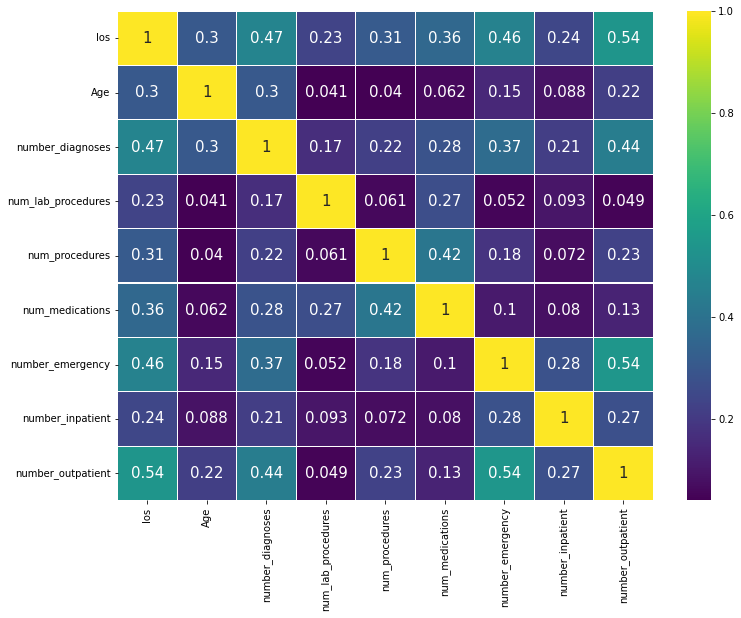

In [25]:
# We plot our variables
f, ax = plt.subplots(figsize=(12, 9)) # Setting size of the results panel
sns.heatmap(hospital.corr() ,linewidths=.1, annot=True, annot_kws={"size": 15}, cmap='viridis', ax=ax)
del f
del ax

Most of the cells are dark, indicating correlation close to 0. If two or more features are strongly correlated to each other, we could consider them as extra parameters. 

Although we do not see strong correlations between the continuous features of our dataset, there is a noticeable light blue square in a few places of the matrix. This indicates that there is some correlation between length of stay, number of diagnoses, number of procedures and number of medications. This makes sense, as we would expect the length of stay to increase with an increasing number of procedures and medications. The diagonal line is simply each features correlation with itself, which is of course 1 (indicating perfect correlation).

Note: From the book "Hands-on Machine Learning with Scikit-Learn & Tensorflow" by Aurelien Geron:

![alt text](https://drive.google.com/uc?export=view&id=13WdwfNS20Jkt6iSEtkmx9kVJ8anzEfQA)

## 6.4 Visualisation of our outcome variable: 'Readmission' 

As we could see in the descriptive statistics section, our dataset is an imbalanced dataset. 

**Let's visualise the outcome variable to have a better idea of the differences between both classes, 'Yes' and 'No'.**

For this, we will use **matplotlib library**, which allows us to create a single plot or a set of subplots. [More information on visualisation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) and [matplot library](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html).

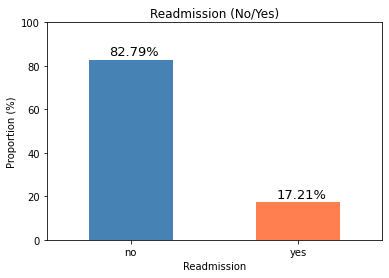

In [26]:
# Plot proportions for each class of 'readmission', by using the command: DataFrame.column.value_counts(normalize=True).plot()
color = ['steelblue', 'coral'] 
ax = (hospital.readmission.value_counts(normalize=True)*100).plot(kind="bar",color=color, rot=0)
ax.set_yticks(np.arange(0, 120,20))
ax.set_ylabel('Proportion (%)')
ax.set_xlabel('Readmission')
ax.set_title('Readmission (No/Yes)')

# Adding labels to each bar
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())
del i

total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # setting position and format of the bar labels 
    ax.text(i.get_x()+0.12, i.get_height()+2, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13)
del i

del ax
del color
del total
del totals

## 6.5 Visualising the features regarding "readmission" 


### 6.5.1. Continuous Numeric Variables by Readmission 

Lets look at how the continuous numeric variables are distributed regarding **readmission**.    

In [27]:
# Selecting continuous variables to plot them all together. Python command: DataFrame[[column selection]]
hospital_plot = hospital[['los', 'num_lab_procedures','num_procedures','num_medications',
                        'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses','Age','readmission']]

# Transforming our data from wide to long format for our plots. Python command: DataFrame.melt([group variable],var_name,value_name)
hospital_plot = hospital_plot.melt(['readmission'], var_name='cols',  value_name='vals')
hospital_plot.sort_values('readmission', inplace=True)

#### Histograms of continuous variables regarding 'readmission'

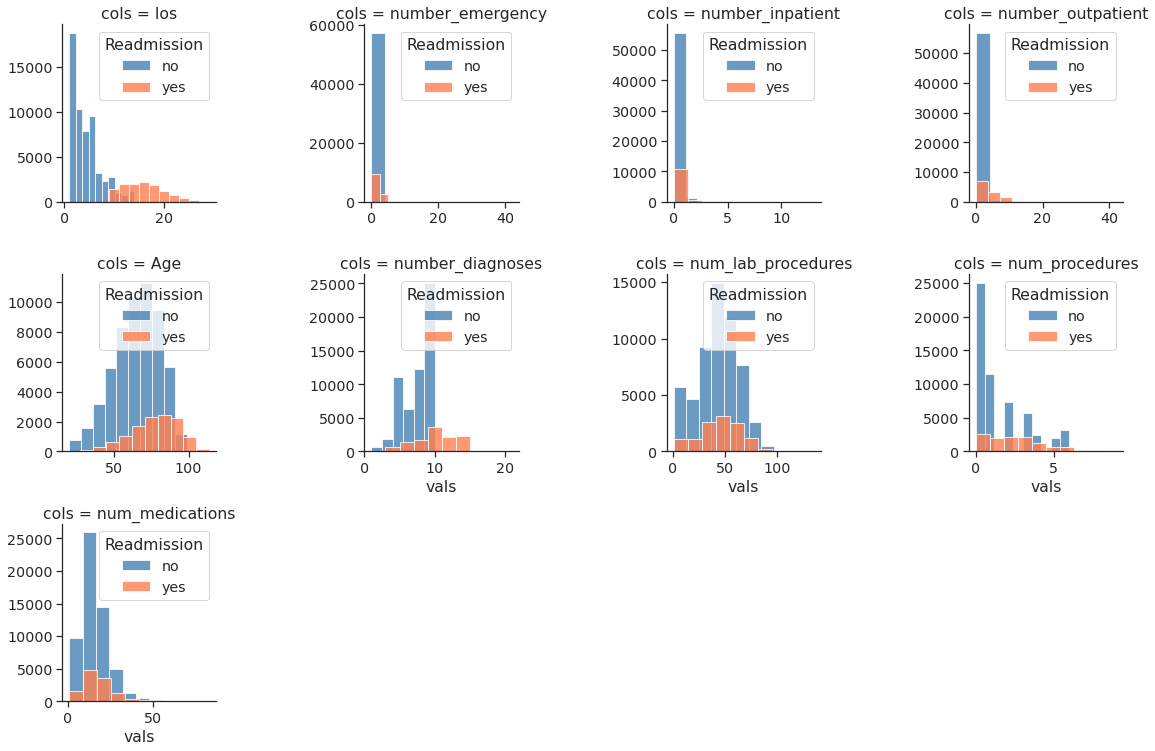

In [28]:
sns.set(style="ticks", font_scale=1.3)
pal = dict(yes="coral", no="steelblue")   # Palette of colours

# Plotting all the continuous/numeric variables of our dataset, regarding 'readmission'
p = sns.FacetGrid(hospital_plot, col='cols', hue="readmission", palette=pal, legend_out=False, sharex=False, sharey=False, col_wrap=4)
p = (p.map(plt.hist, "vals", alpha=0.8).add_legend())
p.fig.set_size_inches(17,11)

# Adding the legend to each plot
for ax in p.axes.ravel():
    ax.legend(title="Readmission")   

del p
del ax

If we want to visualise the same information considering percentages instead of value counts, we need to add the condition: `density = True` within our histogram plot. [See more information](https://seaborn.pydata.org/)

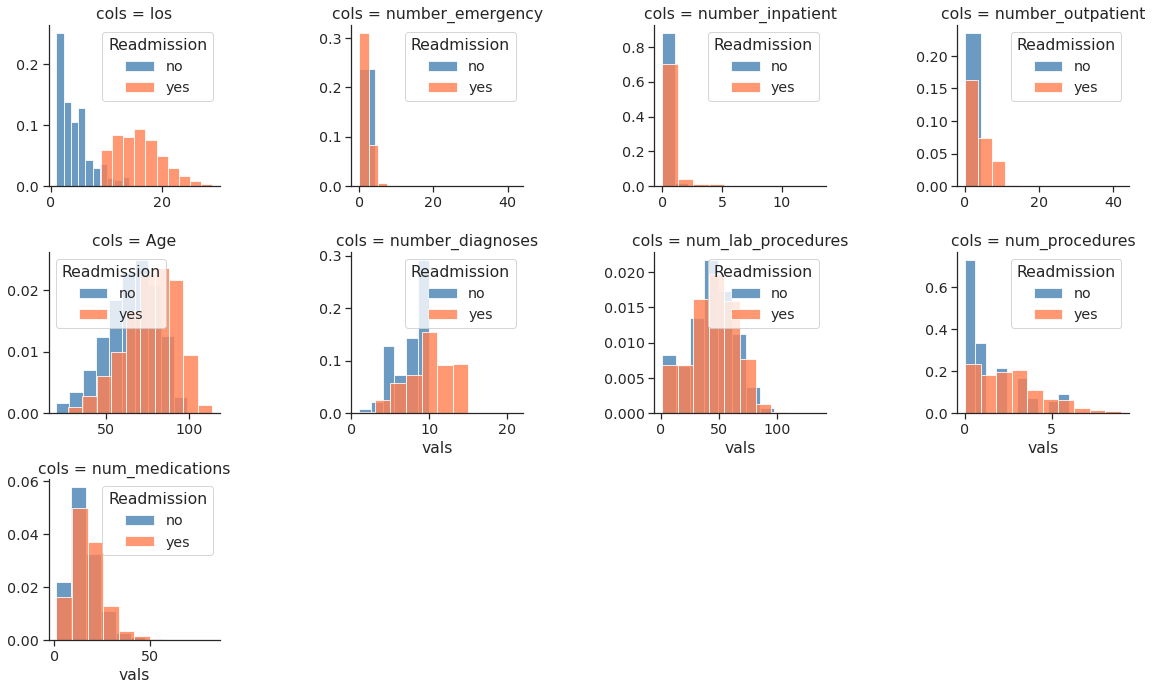

In [29]:
# Plotting all the continuous/numeric variables of our dataset, regarding 'readmission' - PERCENTAGES

sns.set(style="ticks", font_scale=1.3)
g = sns.FacetGrid(hospital_plot, col='cols', hue="readmission", palette=pal, legend_out=False, sharex=False, sharey=False, col_wrap=4)
g = (g.map(plt.hist, "vals", alpha=0.8, density=True).add_legend())    # Adding density=True
g.fig.set_size_inches(17,10)

## Adding the legend to each plot
for ax in g.axes.ravel():
    ax.legend(title="Readmission")   

del g
del ax

#### Density plots of continuous variables regarding 'readmission'

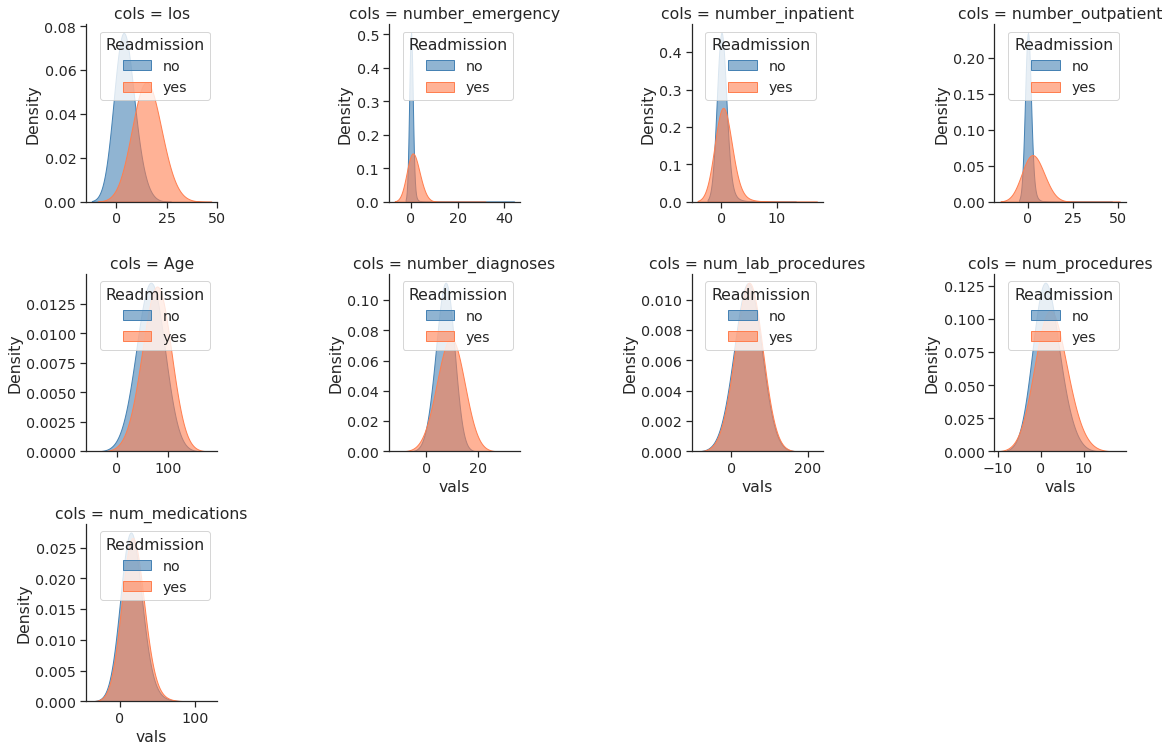

In [30]:
sns.set(style="ticks", font_scale=1.3)
pal = dict(yes="coral", no="steelblue")   # Palette of colours

# Plotting all the continuous/numeric variables of our dataset, regarding 'readmission'
p = sns.FacetGrid(hospital_plot, col='cols', hue="readmission", palette=pal, legend_out=False, sharex=False, sharey=False, col_wrap=4)
p = (p.map(sns.kdeplot, "vals", alpha=0.6, shade=True, bw=1.5).add_legend())
p.fig.set_size_inches(17,11)

# Adding the legend to each plot
for ax in p.axes.ravel():
    ax.legend(title="Readmission")  

del p
del ax 

#### **Lets create box plots to visualise the same variables by readmission**


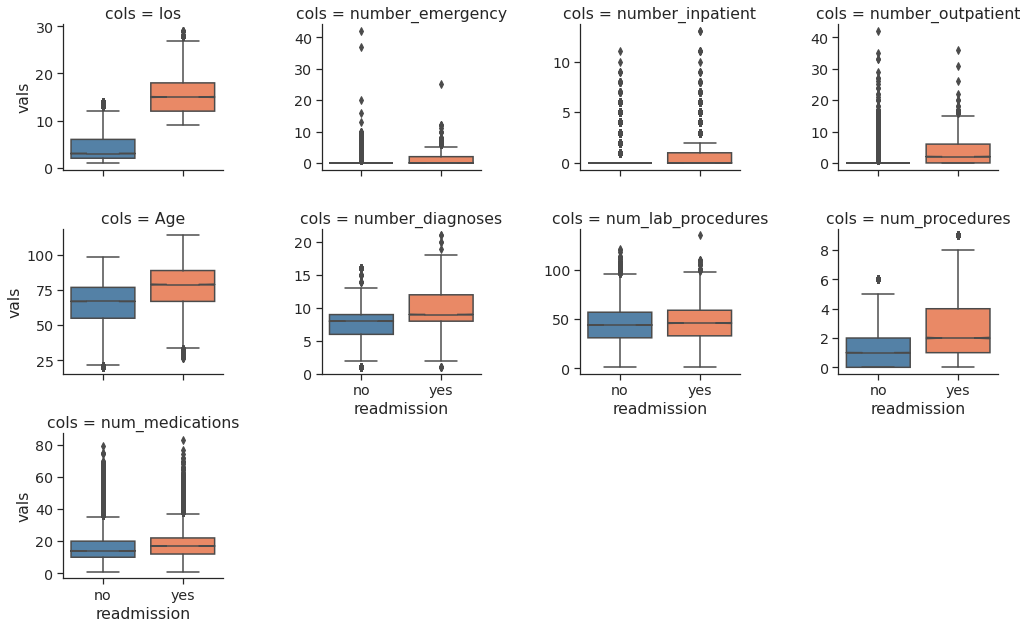

In [31]:
# Box plot of all the continuous/numeric variables regarding 'readmissions'
sns.set(style="ticks", font_scale=1.3)
p = sns.axisgrid.FacetGrid(hospital_plot, col='cols', palette=pal, sharey=False, col_wrap=4)
p = (p.map(sns.boxplot, 'readmission','vals', palette=pal, notch=True))
p.fig.set_size_inches(15,9)

del p

<div class="alert alert-block alert-success">**Start Activity**</div>

### <font color='brown'> Question 3: Can you describe the differences of each continuous numeric variable with respect to the readmission variable? Type your answer in the space provided below.  </font>

<b> Write the answer here:</b>
#####################################################################################################################

As with the results obtained through the 'describe()' function seen in Q1, re-admitted patients tended to be older, spend more time admitted into hospital (initial hospital stay), as well as have more medications administered and recieve more medical diagnoses compared with  non-readmitted patients. 

#####################################################################################################################

<div class="alert alert-block alert-warning">**End Activity**</div>

### 6.5.2 Categorical variables by readmission: 
 
Let's plot **some** of the categorical variables recorded in our dataset, focusing on our output: 'readmission'. In this case, we will use **bar plots** instead of histograms. A histogram shows the distribution of a continuous numeric variable by grouping ranges of the data into bins. Bar charts plot categorical data.

For this, we will use another technique to visualise data in Python. We will use a **machine learning library** that contains the syntax to plot stacked percentage bar graphs of the categorical variables regarding the outcome (readmission). 

In our case, the name of this library is **'Library_Stacked_Percent_Plot'**. 

Please make sure to have installed the last version of 'matplotlib' to be able to run this part of the Jupyter notebook.

In this case, we are going to download this library and copy it in the Google Drive, inside the folder /HDAT9500/week01/, that is, the project path we created above. You can place it in another folder if you prefer so, but make the notebook knows where to look when importing the py module.

In [32]:
project_path

PosixPath('/content/drive/MyDrive/HDAT9500/week01')

In [33]:
%cd /content/drive/MyDrive/HDAT9500/week01

/content/drive/MyDrive/HDAT9500/week01


Download the library `Library_Stacked_Percent_Plot.py` and save it inside your Google Drive. Check with the `ls` instruction that the library is indeed in the path/folder you think it is.

In [34]:
!ls

data  Library_Stacked_Percent_Plot.py


In [35]:
import sys
sys.path.append("'/content/drive/MyDrive/HDAT9500/week01'")
import Library_Stacked_Percent_Plot

In [36]:
# Selecting the categorical variables we want to plot
cat_features = ['sex','weight','payer_code','A1Cresult','max_glu_serum','group_name_1','group_name_2','group_name_3']

# Set as categorical features as category data types
for feature in cat_features:
    hospital[feature] = hospital[feature].astype('category')

del feature

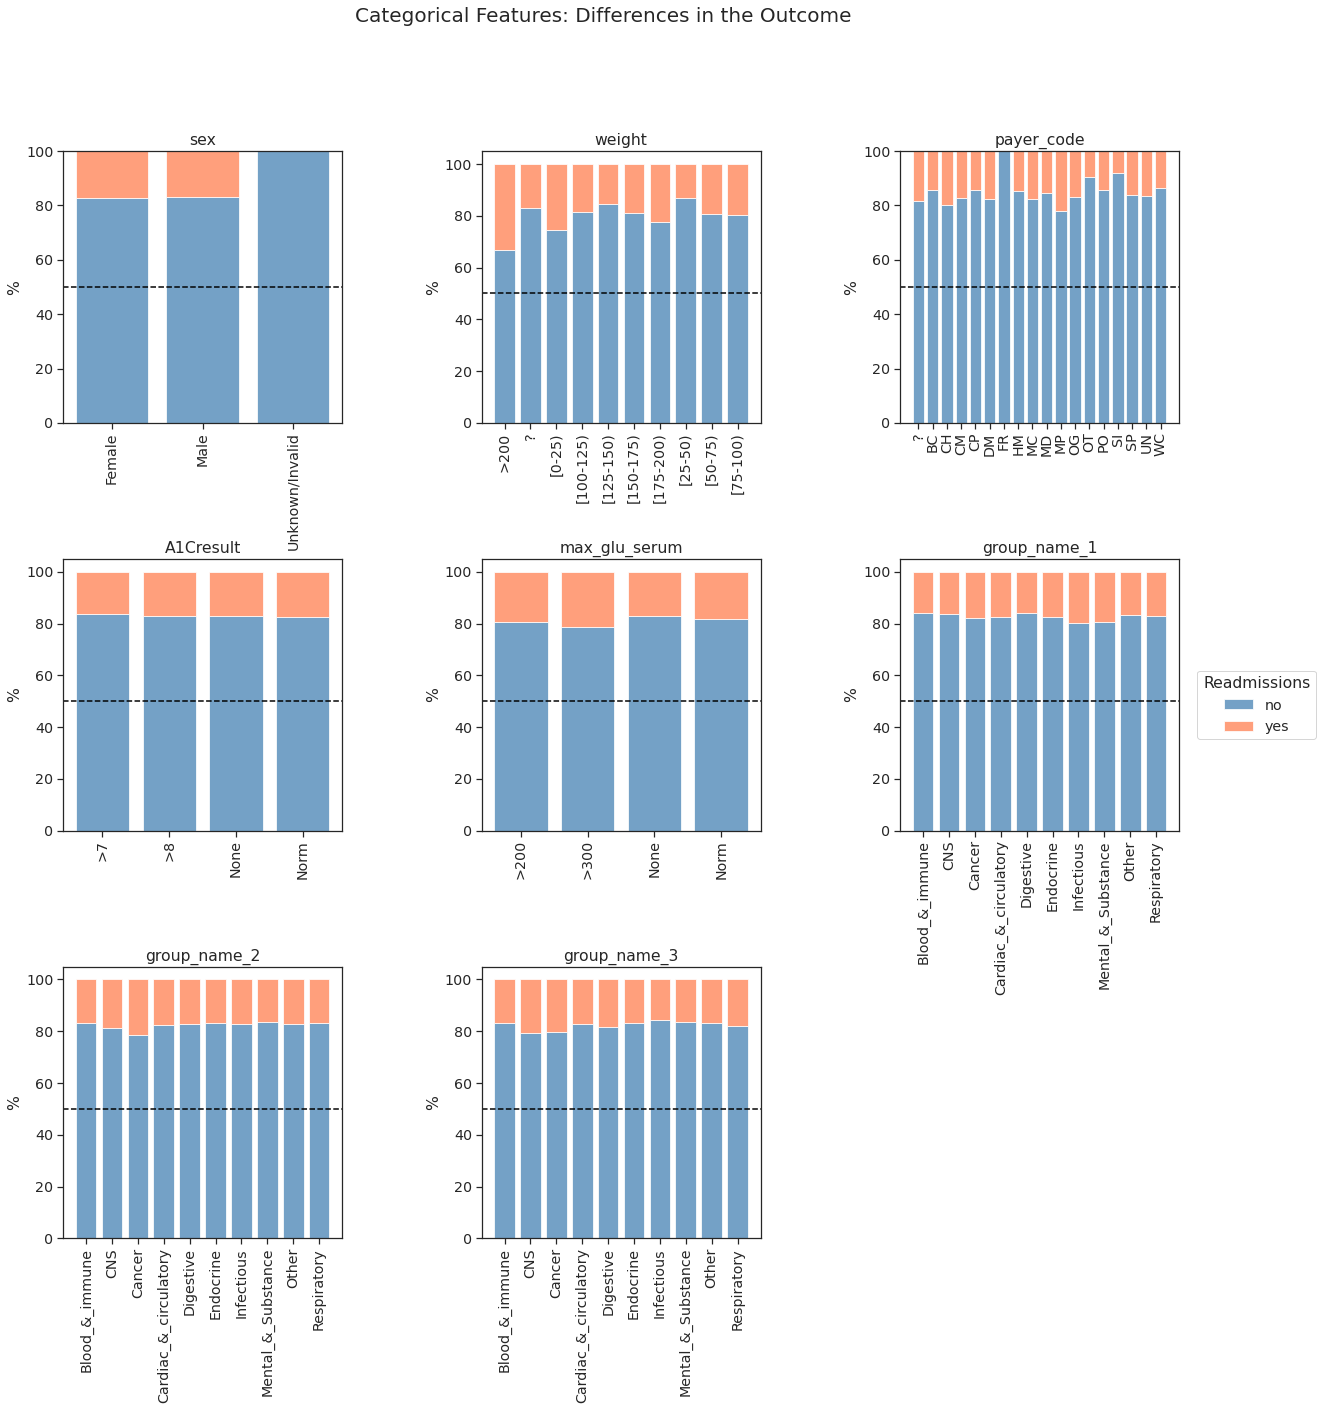

In [37]:
# Plot the frequency percentages in a stacked bar chart
Library_Stacked_Percent_Plot.stacked_percent_bar(cat_features, hospital)

As we see, there are no inconsistencies regarding the 'sex', 'max_glu_serum', 'A1Cresult' and 'group_name_1' to 'group_name_3' variables. However, the variables 'weight' and 'payer_code' have some misclassified records ('?'). In the next section, we will analyse how many missing values have our features in order to make decisions regarding the data cleaning process.

<div class="alert alert-block alert-success">**Start Activity**</div>

### <font color='brown'> Question 4: Can you create bar plots for 'admission_type_id_cat', 'discharge_disposition_id_cat' and 'admission_source_id_cat' by readmission? Please provide a brief comment of your results. Type your answer in the space provided below.  </font>

<p><font color='green'> Tip: You can use the library already created in the previous step. 
    </font></p>
    
<p><font color='green'> Please see the Data Dictionary to better understand the categories of these three variables: data/diabetes/Data_Dictionary.pdf 
    </font></p>

#### <p><font color='green'> Note: We will use dictionary mapping to group these three variables in Chapter 02 – Exercise 01


In [38]:
# Write your Python code here:

# Selecting the categorical variables we want to plot
cat_features_2 = ['admission_type_id_cat','discharge_disposition_id_cat','admission_source_id_cat']

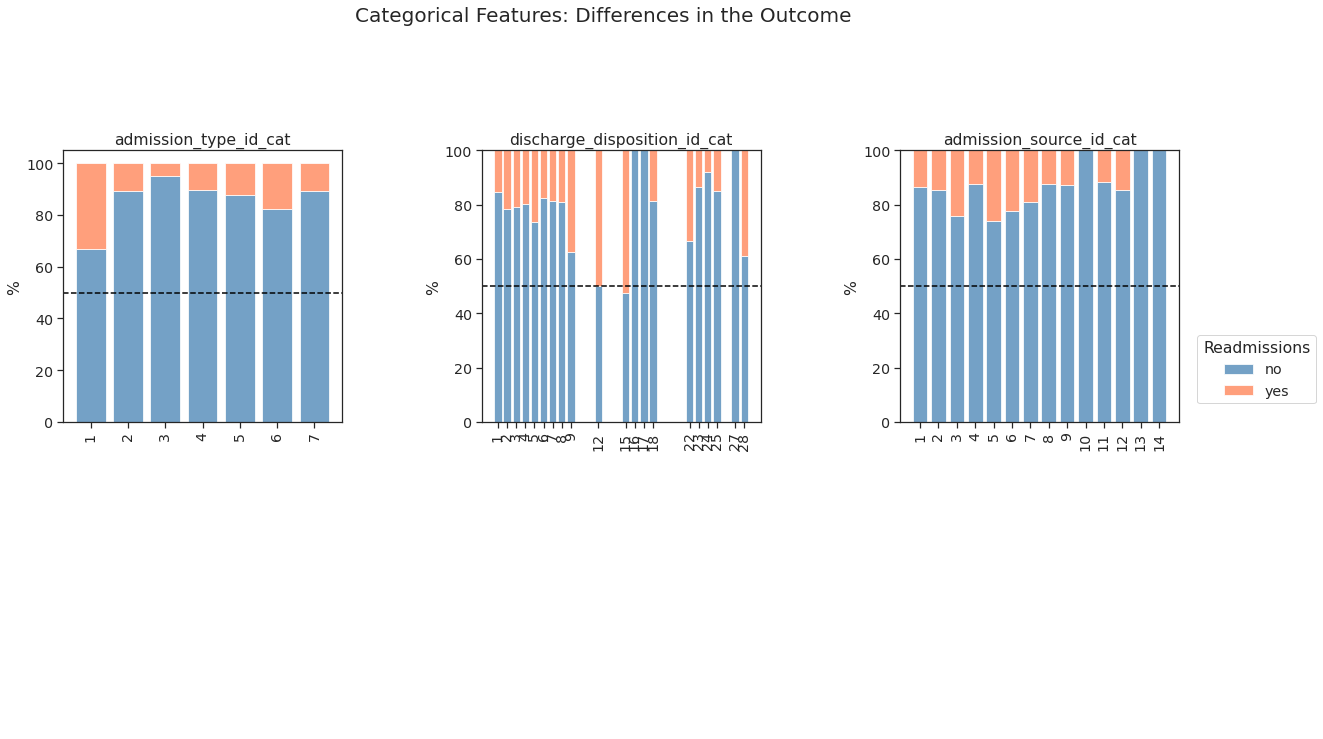

In [39]:
# Write your Python code here:

# Plot the frequency percentages in a stacked bar chart
Library_Stacked_Percent_Plot.stacked_percent_bar(cat_features_2, hospital)

<b> Write the answer here:</b>
#####################################################################################################################

There appears to be no missing values in either categorical variables. The 'discharge_disposition_id_cat' does contain only certain numbers.
#####################################################################################################################

<div class="alert alert-block alert-warning">**End Activity**</div>

### 6.5.3 Check 'Null' and 'Not null' values per column/feature

We can see the records of our features by using the command: **`DataFrame.feature.value_counts()`**. However, we can instantly see how many missing, null or not null values have our variables: 

1. First, we have to replace the value "?" that in our dataset means missing by "NAN" (not a number). 
2. We check if the features are null (`isnull()`). This function will give us 1=TRUE or 0=FALSE. 
3. We then sum all the "1s" to check how many missing values we have.  The sum is done along the "axis=0". That means, summing all the rows.

**First, we check for null values in our dataset.** 

In [40]:
# Total number of null records of our dataset
print("Total number of null records: ", hospital.isnull().values.sum())

# Null values of all our features
print(hospital.isnull().sum())

Total number of null records:  0
los                             0
Age                             0
sex                             0
weight                          0
payer_code                      0
medical_specialty               0
max_glu_serum                   0
A1Cresult                       0
number_diagnoses                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_emergency                0
number_inpatient                0
number_outpatient               0
group_name_1                    0
group_name_2                    0
group_name_3                    0
readmission                     0
admission_type_id_cat           0
discharge_disposition_id_cat    0
admission_source_id_cat         0
dtype: int64


We can see that the variables 'weight', 'payer_code' and 'medical_specialty' have 0 missing records. However, we could visualise that these variables have misclassified records ('?'). Thus, we will follow the steps mentioned above to replace the value '?' to NAN.

**Let's transform the values '?' to NAN for ALL the variables of our dataset and store it in a temporal dataset**: 
We create a temporary data set, 'hosp_temp', where we will have the data with the transformation of ? to NaN. 

In [41]:
# Create a temporary data set, 'hosp_temp', where we will have the data with the transformation of ? to NAN
hosp_temp = hospital.replace('?', np.nan) 

<div class="alert alert-block alert-success">**Start Activity**</div>

### <font color='brown'> Question 5: Check for null values in our transformed dataset (hosp_temp). Please briefly comment your results. Type your answer in the space provided below.  </font>

In [42]:
# Write solution here:
# Total number of null records of our dataset
print("Total number of null records: ", hosp_temp.isnull().values.sum())

# Null values of all our features
print(hosp_temp.isnull().sum())

Total number of null records:  129838
los                                 0
Age                                 0
sex                                 0
weight                          66504
payer_code                      29912
medical_specialty               33422
max_glu_serum                       0
A1Cresult                           0
number_diagnoses                    0
num_lab_procedures                  0
num_procedures                      0
num_medications                     0
number_emergency                    0
number_inpatient                    0
number_outpatient                   0
group_name_1                        0
group_name_2                        0
group_name_3                        0
readmission                         0
admission_type_id_cat               0
discharge_disposition_id_cat        0
admission_source_id_cat             0
dtype: int64


<b> Write the answer here:</b>
#####################################################################################################################

As seen in our stacked plots, the `weight`, `payer_code`, `medical_specialty` features have 66504, 29912 and 33422 missing values, respectively. 

#####################################################################################################################

<div class="alert alert-block alert-warning">**End Activity**</div>

<div class="alert alert-block alert-success">**Start Activity**</div>

### <font color='brown'> Question 6: Based on the visualisations and analysis of missing or null values, would you delete any features? If yes, which ones?</font>

<b> Write the answer here:</b>
#####################################################################################################################

All three variables/features with missing values can be removed?


#####################################################################################################################

We create a new dataset named hospital_clean from the original dataset (hospital).
Delete the columns that you consider should be removed from the list below.
Let's see assume that we are going to delete the variable "weight" since the number of NaN values is more than 50%, and their distribution is very similar for readmission "yes" and "no". 

In [43]:
hospital_clean = hospital.drop(['weight'], axis=1)

In [44]:
#Sanity check:
print("Keys of hospital data: {}".format(hospital_clean.keys()))

Keys of hospital data: Index(['los', 'Age', 'sex', 'payer_code', 'medical_specialty', 'max_glu_serum',
       'A1Cresult', 'number_diagnoses', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_emergency', 'number_inpatient',
       'number_outpatient', 'group_name_1', 'group_name_2', 'group_name_3',
       'readmission', 'admission_type_id_cat', 'discharge_disposition_id_cat',
       'admission_source_id_cat'],
      dtype='object')


In [45]:
#Sanity check:
print(hospital_clean.shape)

(69270, 21)


<div class="alert alert-block alert-warning">**End Activity**</div>

### 6.5.4 Saving our new cleaned dataset with dummy variables using 'pickle'.

We will save our dataset by using 'pickle'. Pickle is used to store python objects (lists, dictionaries, dataframe) in a file that we can call or load after. In our case, we will store our dataset in pickle and load it in the following exercises of this an other Chapters. 

First, we will open a file that we will call **'hospital.pickle'**. Then, we will use `pickle.dump()` to put the dataset into the opened file, then close. [Mode information](https://docs.python.org/3/library/pickle.html)

If you are running this notebook in Google Colab, you must define your project paths. In this case, define your `pickle_path`. Otherwise, the piclke will be deteled after the session finishes.

In [46]:
import pickle
pickle_path = Path(project_path) /'hospital.pickle' # 'hospital.pickle' will be our final file

with open(pickle_path, 'wb') as output:  
    pickle.dump(hospital_clean, output) 

**Note:** If we want to load our dataset back, we can use the following script. We will use this code in the following exercise (no need to use it in this exercise).

In [ ]:
# import pickle

# with open(pickle_path, 'rb') as data:
#    hospital = pickle.load(data)

© 2022 Copyright The University of New South Wales - CRICOS 00098G